## Project: Classification of Heart diseases
#### * By: Aru Nurzhaussyn Nazym*

In [1]:
import pandas as pnd
import numpy as np
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn import cross_validation
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import operator
from sklearn.cross_validation import KFold
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
import seaborn as sns
from IPython.display import Image
%matplotlib inline

D:\3-year\MV\setup\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
header_row = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

heart = pnd.read_csv('data.csv', names=header_row)
heart[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [105]:
print(heart)

      age  sex  chest_pain  blood pressure  serum_cholestoral  \
0    63.0  1.0         1.0           145.0              233.0   
1    67.0  1.0         4.0           160.0              286.0   
2    67.0  1.0         4.0           120.0              229.0   
3    37.0  1.0         3.0           130.0              250.0   
4    41.0  0.0         2.0           130.0              204.0   
5    56.0  1.0         2.0           120.0              236.0   
6    62.0  0.0         4.0           140.0              268.0   
7    57.0  0.0         4.0           120.0              354.0   
8    63.0  1.0         4.0           130.0              254.0   
9    53.0  1.0         4.0           140.0              203.0   
10   57.0  1.0         4.0           140.0              192.0   
11   56.0  0.0         2.0           140.0              294.0   
12   56.0  1.0         3.0           130.0              256.0   
13   44.0  1.0         2.0           120.0              263.0   
14   52.0  1.0         3.

In [6]:
names_descr = dict()
categorical_columns = ["sex", "chest_pain", "fasting_blood_sugar", "electrocardiographic", "induced_angina", "slope", "vessels", \
                       "thal", "diagnosis"]
for c in categorical_columns:
    print(heart.groupby([c])["age"].count())

sex
0.0     97
1.0    206
Name: sex, dtype: int64
chest_pain
1.0     23
2.0     50
3.0     86
4.0    144
Name: sex, dtype: int64
fasting_blood_sugar
0.0    258
1.0     45
Name: sex, dtype: int64
electrocardiographic
0.0    151
1.0      4
2.0    148
Name: sex, dtype: int64
induced_angina
0.0    204
1.0     99
Name: sex, dtype: int64
slope
1.0    142
2.0    140
3.0     21
Name: sex, dtype: int64
vessels
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: sex, dtype: int64
thal
3.0    166
6.0     18
7.0    117
?        2
Name: sex, dtype: int64
diagnosis
0    164
1     55
2     36
3     35
4     13
Name: sex, dtype: int64


In [8]:
for c in heart.columns[:-1]:
    heart[c] = heart[c].apply(lambda x: heart[heart[c]!='?'][c].astype(float).mean() if x == "?" else x)
    heart[c] = heart[c].astype(float)
heart_d = heart[heart["diagnosis"] >= 1 ]

In [9]:
print ("Minimum age to Maximum age per disease type")

heart_d.groupby(["diagnosis", ])["age"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


diagnosis
1    35.0, 70.0
2    42.0, 69.0
3    39.0, 70.0
4    38.0, 77.0
Name: age, dtype: object

In [119]:
print ("Mean age per disease type")
heart_d.groupby(["diagnosis", ])["age"].mean()

Mean age per disease type


diagnosis
1    55.381818
2    58.027778
3    56.000000
4    59.692308
Name: age, dtype: float64

In [120]:
print ("Count each sex per heart disease type")
heart_d.groupby(["diagnosis", "sex"])["age"].count()

Count each sex per heart disease type


diagnosis  sex
1          0.0     9
           1.0    46
2          0.0     7
           1.0    29
3          0.0     7
           1.0    28
4          0.0     2
           1.0    11
Name: age, dtype: int64

In [121]:
print ("Count each chest pain value per heart disease type")
heart_d.groupby(["diagnosis", "chest_pain"])["age"].count()

Count each chest pain value per heart disease type


diagnosis  chest_pain
1          1.0            5
           2.0            6
           3.0            9
           4.0           35
2          1.0            1
           2.0            1
           3.0            4
           4.0           30
3          2.0            2
           3.0            4
           4.0           29
4          1.0            1
           3.0            1
           4.0           11
Name: age, dtype: int64

In [122]:
print ("Minimum blood pressure to Maximum  blood pressure per disease type")

heart_d.groupby(["diagnosis"])["blood pressure"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["blood pressure"].max().astype(str)

Minimum blood pressure to Maximum  blood pressure per disease type


diagnosis
1    108.0, 192.0
2    100.0, 180.0
3    100.0, 200.0
4    112.0, 165.0
Name: blood pressure, dtype: object

In [123]:
print ("Mean blood pressure per disease type")
heart_d.groupby(["diagnosis", ])["blood pressure"].mean()

Mean blood pressure per disease type


diagnosis
1    133.254545
2    134.194444
3    135.457143
4    138.769231
Name: blood pressure, dtype: float64

In [124]:
print ("Minimum serum_cholestoral to Maximum serum_cholestoral per disease type")

heart_d.groupby(["diagnosis"])["serum_cholestoral"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["serum_cholestoral"].max().astype(str)

Minimum serum_cholestoral to Maximum serum_cholestoral per disease type


diagnosis
1    149.0, 335.0
2    169.0, 409.0
3    131.0, 353.0
4    166.0, 407.0
Name: serum_cholestoral, dtype: object

In [125]:
print ("Mean serum_cholestoral per disease type")
heart_d.groupby(["diagnosis", ])["serum_cholestoral"].mean()

Mean serum_cholestoral per disease type


diagnosis
1    249.109091
2    259.277778
3    246.457143
4    253.384615
Name: serum_cholestoral, dtype: float64

In [126]:
print ("Count each fasting_blood_sugar per heart disease type")
heart_d.groupby(["diagnosis", "fasting_blood_sugar"])["age"].count()

Count each fasting_blood_sugar per heart disease type


diagnosis  fasting_blood_sugar
1          0.0                    51
           1.0                     4
2          0.0                    27
           1.0                     9
3          0.0                    27
           1.0                     8
4          0.0                    12
           1.0                     1
Name: age, dtype: int64

In [127]:
print ("Count each electrocardiographic per heart disease type")
heart_d.groupby(["diagnosis", "electrocardiographic"])["age"].count()

Count each electrocardiographic per heart disease type


diagnosis  electrocardiographic
1          0.0                     23
           2.0                     32
2          0.0                     19
           1.0                      1
           2.0                     16
3          0.0                     12
           1.0                      1
           2.0                     22
4          0.0                      2
           1.0                      1
           2.0                     10
Name: age, dtype: int64

In [128]:
print ("Minimum max_heart_rate to Maximum max_heart_rate per disease type")

heart_d.groupby(["diagnosis"])["max_heart_rate"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["max_heart_rate"].max().astype(str)

Minimum max_heart_rate to Maximum max_heart_rate per disease type


diagnosis
1     88.0, 195.0
2     71.0, 170.0
3     90.0, 173.0
4    114.0, 182.0
Name: max_heart_rate, dtype: object

In [129]:
print ("Mean max_heart_rate per disease type")
heart_d.groupby(["diagnosis", ])["max_heart_rate"].mean()

Mean max_heart_rate per disease type


diagnosis
1    145.927273
2    135.583333
3    132.057143
4    140.615385
Name: max_heart_rate, dtype: float64

In [130]:
print ("Count  induced_angina per heart disease type")
heart_d.groupby(["diagnosis", "induced_angina"])["age"].count()

Count  induced_angina per heart disease type


diagnosis  induced_angina
1          0.0               30
           1.0               25
2          0.0               14
           1.0               22
3          0.0               12
           1.0               23
4          0.0                7
           1.0                6
Name: age, dtype: int64

In [131]:
print ("Count  mean ST_depression per heart disease type")
heart_d.groupby(["diagnosis"])["ST_depression"].mean()

Count  mean ST_depression per heart disease type


diagnosis
1    1.005455
2    1.780556
3    1.962857
4    2.361538
Name: ST_depression, dtype: float64

In [133]:
print ("Count slope per heart disease type")
heart_d.groupby(["diagnosis", "slope"])["age"].count()

Count slope per heart disease type


diagnosis  slope
1          1.0      22
           2.0      31
           3.0       2
2          1.0       7
           2.0      26
           3.0       3
3          1.0       6
           2.0      24
           3.0       5
4          1.0       1
           2.0      10
           3.0       2
Name: age, dtype: int64

In [134]:
print ("Count  mean vessels per heart disease type")
heart_d.groupby(["diagnosis"])["vessels"].mean()

Count  mean vessels per heart disease type


diagnosis
1    0.739495
2    1.222222
3    1.457143
4    1.692308
Name: vessels, dtype: float64

In [135]:
print ("Count  mean thal per heart disease type")
heart_d.groupby(["diagnosis"])["thal"].mean()

Count  mean thal per heart disease type


diagnosis
1    5.345455
2    5.992617
3    6.285714
4    6.230769
Name: thal, dtype: float64

### We can consider that the person with 

#### age > 38
#### man
#### with chest pain = 4
#### blood pressure > 112
#### serum_cholestoral > 166
#### fasting_blood_sugar = 0
#### electrocardiographic = 2
#### max_heart_rate > 114
#### ST_depression about 2
#### slope >=2
#### vessels about 1.6
#### thal more than 6

### is the most likely have 4 type of the heart disease

In [14]:
# if "diagnosis" == 0, member does not have disease A - we put 0
# if "diagnosis" >= 1, member possess the disease A - we put 1
heart.loc[:, "diag_int"] = heart.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)

In [15]:
preprocessing.Normalizer().fit_transform(heart)

array([[ 0.19741527,  0.00313358,  0.00313358, ...,  0.01880145,
         0.        ,  0.        ],
       [ 0.19057465,  0.0028444 ,  0.01137759, ...,  0.00853319,
         0.0056888 ,  0.0028444 ],
       [ 0.22578159,  0.00336987,  0.0134795 , ...,  0.02358912,
         0.00336987,  0.00336987],
       ..., 
       [ 0.25334975,  0.00444473,  0.01777893, ...,  0.03111313,
         0.0133342 ,  0.00444473],
       [ 0.17495449,  0.        ,  0.00613875, ...,  0.00920813,
         0.00306938,  0.00306938],
       [ 0.13346695,  0.00351229,  0.01053686, ...,  0.01053686,
         0.        ,  0.        ]])

In [16]:
heart_train, heart_test, goal_train, goal_test = cross_validation.train_test_split(heart.loc[:,'age':'thal'], \
                                                 heart.loc[:,'diag_int'], test_size=0.33, random_state=0)
#print(goal_train)

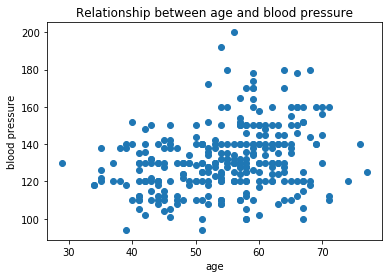

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("age")
plt.ylabel("blood pressure")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.scatter(heart['age'], heart['blood pressure'])
plt.show()

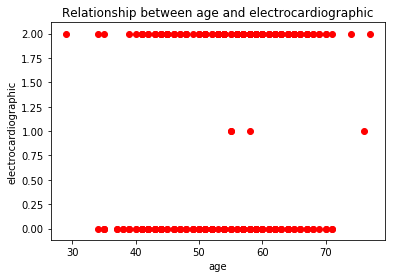

In [141]:
plt.xlabel("age")
plt.ylabel("electrocardiographic")

# define title
plt.title("Relationship between age and electrocardiographic")

# plot
plt.scatter(heart['age'], heart['electrocardiographic'], color = 'red')
plt.show()

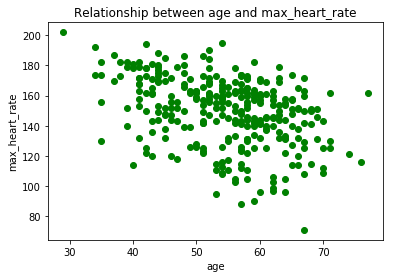

In [142]:
plt.xlabel("age")
plt.ylabel("max_heart_rate")

# define title
plt.title("Relationship between age and max_heart_rate")

# plot
plt.scatter(heart['age'], heart['max_heart_rate'], color = 'green')
plt.show()

In [18]:
loss = ["hinge", "log"]
penalty = ["l1", "l2"]
alpha = [0.1, 0.05, 0.01]
n_iter = [500, 1000]

best_score = 0
best_param = (0,0,0,0)
for l in loss:
    for p in penalty:
        for a in alpha:
            for n in n_iter:
                print("Parameters for model", (l,p,a,n))
                lss = SGDClassifier(loss=l, penalty=p, alpha=a, n_iter=n)
                lss.fit(heart_train, goal_train)
                print("Linear regression SGD Cross-Validation scores:")
                scores = cross_validation.cross_val_score(lss, heart.loc[:,'age':'thal'], heart.loc[:,'diag_int'], cv=10)
                print (scores)
                print("Mean Linear regression SGD Cross-Validation score = ", np.mean(scores))
                
                if np.mean(scores) > best_score:
                    best_score = np.mean(scores)
                    best_param = (l,p,a,n)
                    
    
print("The best parameters for model are ", best_param)
print("The Cross-Validation score = ", best_score)


Parameters for model ('hinge', 'l1', 0.1, 500)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.77419355  0.83870968  0.83870968  0.87096774  0.76666667  0.6
  0.73333333  0.7         0.73333333  0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.764901742677
Parameters for model ('hinge', 'l1', 0.1, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.77419355  0.87096774  0.83870968  0.83870968  0.8         0.63333333
  0.73333333  0.76666667  0.73333333  0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.77823507601
Parameters for model ('hinge', 'l1', 0.05, 500)
Linear regression SGD Cross-Validation scores:
[ 0.80645161  0.87096774  0.83870968  0.90322581  0.8         0.6
  0.73333333  0.7         0.73333333  0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.777912495365
Parameters for model ('hinge', 'l1', 0.05, 1000)


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.77419355  0.83870968  0.83870968  0.87096774  0.8         0.63333333
  0.7         0.8         0.8         0.86206897]
Mean Linear regression SGD Cross-Validation score =  0.791798294401
Parameters for model ('hinge', 'l1', 0.01, 500)
Linear regression SGD Cross-Validation scores:
[ 0.80645161  0.83870968  0.80645161  0.93548387  0.8         0.66666667
  0.66666667  0.8         0.8         0.86206897]


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

Mean Linear regression SGD Cross-Validation score =  0.798249907304
Parameters for model ('hinge', 'l1', 0.01, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.83870968  0.83870968  0.74193548  0.93548387  0.8         0.56666667
  0.73333333  0.8         0.8         0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.784794215795
Parameters for model ('hinge', 'l2', 0.1, 500)
Linear regression SGD Cross-Validation scores:
[ 0.80645161  0.58064516  0.4516129   0.90322581  0.8         0.56666667
  0.7         0.7         0.7         0.65517241]
Mean Linear regression SGD Cross-Validation score =  0.686377456433
Parameters for model ('hinge', 'l2', 0.1, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.87096774  0.77419355  0.80645161  0.93548387  0.7         0.63333333
  0.76666667  0.83333333  0.73333333  0.86206897]
Mean Linear regression SGD Cross-Validation score =  0.791583240638
Parameters for model ('hinge', 'l2', 0.05, 500)
Linear regression SGD Cross-Validation scores:
[ 0.83870968  0.77419355  0.77419355  0.90322581  0.8         0.63333333
  0.76666667  0.73333333  0.7         0.48275862]
Mean Linear regression SGD Cross-Validation score =  0.740641453467
Parameters for model ('hinge', 'l2', 0.05, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.83870968  0.80645161  0.64516129  0.67741935  0.83333333  0.76666667
  0.63333333  0.56666667  0.7         0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.726084538376
Parameters for model ('hinge', 'l2', 0.01, 500)
Linear regression SGD Cross-Validation scores:
[ 0.61290323  0.80645161  0.70967742  0.4516129   0.8         0.53333333
  0.46666667  0.8         0.63333333  0.68965517]
Mean Linear regression SGD Cross-Validation score =  0.650363366704
Parameters for model ('hinge', 'l2', 0.01, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.67741935  0.58064516  0.80645161  0.90322581  0.7         0.76666667
  0.76666667  0.56666667  0.73333333  0.48275862]
Mean Linear regression SGD Cross-Validation score =  0.698383388951
Parameters for model ('log', 'l1', 0.1, 500)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.83870968  0.87096774  0.83870968  0.87096774  0.8         0.73333333
  0.7         0.73333333  0.73333333  0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.791245828699
Parameters for model ('log', 'l1', 0.1, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.77419355  0.87096774  0.83870968  0.93548387  0.83333333  0.7
  0.66666667  0.7         0.73333333  0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.784579162032
Parameters for model ('log', 'l1', 0.05, 500)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.77419355  0.83870968  0.83870968  0.87096774  0.8         0.63333333
  0.66666667  0.76666667  0.73333333  0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.771568409344
Parameters for model ('log', 'l1', 0.05, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.87096774  0.87096774  0.83870968  0.93548387  0.8         0.66666667
  0.66666667  0.73333333  0.73333333  0.82758621]
Mean Linear regression SGD Cross-Validation score =  0.794371523915
Parameters for model ('log', 'l1', 0.01, 500)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.80645161  0.83870968  0.80645161  0.90322581  0.76666667  0.7         0.7
  0.8         0.8         0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.791460882462
Parameters for model ('log', 'l1', 0.01, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.83870968  0.90322581  0.83870968  0.93548387  0.8         0.66666667
  0.73333333  0.83333333  0.76666667  0.89655172]
Mean Linear regression SGD Cross-Validation score =  0.82126807564
Parameters for model ('log', 'l2', 0.1, 500)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.80645161  0.77419355  0.48387097  0.80645161  0.9         0.73333333
  0.73333333  0.86666667  0.73333333  0.68965517]
Mean Linear regression SGD Cross-Validation score =  0.752728958102
Parameters for model ('log', 'l2', 0.1, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.87096774  0.4516129   0.5483871   0.77419355  0.83333333  0.6         0.7
  0.66666667  0.76666667  0.82758621]
Mean Linear regression SGD Cross-Validation score =  0.703941416389
Parameters for model ('log', 'l2', 0.05, 500)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.87096774  0.51612903  0.80645161  0.93548387  0.83333333  0.46666667
  0.66666667  0.7         0.76666667  0.86206897]
Mean Linear regression SGD Cross-Validation score =  0.742443455692
Parameters for model ('log', 'l2', 0.05, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.83870968  0.90322581  0.77419355  0.96774194  0.7         0.76666667
  0.73333333  0.83333333  0.73333333  0.51724138]
Mean Linear regression SGD Cross-Validation score =  0.776777901372
Parameters for model ('log', 'l2', 0.01, 500)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.48387097  0.77419355  0.83870968  0.90322581  0.9         0.46666667
  0.53333333  0.56666667  0.53333333  0.75862069]
Mean Linear regression SGD Cross-Validation score =  0.675862068966
Parameters for model ('log', 'l2', 0.01, 1000)
Linear regression SGD Cross-Validation scores:


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

[ 0.74193548  0.74193548  0.74193548  0.93548387  0.86666667  0.63333333
  0.56666667  0.66666667  0.76666667  0.5862069 ]
Mean Linear regression SGD Cross-Validation score =  0.724749721913
The best parameters for model are  ('log', 'l1', 0.01, 1000)
The Cross-Validation score =  0.82126807564


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecatio

In [23]:
lss_best = SGDClassifier(alpha=0.05, fit_intercept=True, loss='log', n_iter=1000,
penalty='l1')
lss_best.fit(heart_train, goal_train)
print("Linear regression SGD Test score:")
print(lss_best.score(heart_test, goal_test))   

Linear regression SGD Test score:
0.81


D:\3-year\MV\setup\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [24]:
# predict heart disease for test dataset
y_pred = lss_best.predict(heart_test)
y_pred[:10]

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [25]:
test_df = pnd.DataFrame(heart_test, columns = header_row[:-1])
test_df.loc[:, "Disease_probability"] = [x[0] for x in lss_best.predict_proba(heart_test)]
test_df[:10]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,Disease_probability
225,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,1.000000e+00
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,2.853497e-10
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,9.995005e-01
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,1.000000e+00
52,44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0,1.000000e+00
245,67.0,1.0,4.0,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0,0.000000e+00
175,57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0,0.000000e+00
168,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,4.835688e-07
223,53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2.0,7.0,0.000000e+00
217,46.0,0.0,4.0,138.0,243.0,0.0,2.0,152.0,1.0,0.0,2.0,0.0,3.0,1.000000e+00
